<a href="https://colab.research.google.com/github/rodrigoclira/mineracao-dados/blob/main/3_1_An%C3%A1lise_Explorat%C3%B3ria_(Parte_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling

https://biostat.app.vumc.org/wiki/pub/Main/DataSets/Ctitanic3.html

In [ ]:
url = "https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.xls"
df = pd.read_excel(url)

In [ ]:
df

#Histograma

O histograma é uma ótima ferramenta para visualizar dados numéricos

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
df.age.plot(kind = "hist", ax = ax) # age ou fare

# Gráfico de Dispersão
Ele mostra o relacionamento entre duas colunas numéricas.

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
df.plot.scatter(x="age", y = "fare", ax=ax, alpha = 0.3)


## Exemplo PIB x Expectativa de Vida

https://www.flai.com.br/juscudilio/scatter-plot-um-guia-completo-para-graficos-de-dispersao/

In [ ]:
url = 'https://github.com/scudilio/Visualizacao_de_dados/blob/master/datasets/gapminder_final.xlsx?raw=true'
df_pib = pd.read_excel(url)
df_pib.head()

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
plt.xscale('log')
df_pib.sample(5000).plot.scatter(x= 'gdpPercap', y = 'lifeExp', ax=ax, alpha = 0.3)


## Correlação

Calculando a correlação de Pearson

In [ ]:
df.age.corr(df.fare)

In [ ]:
df_pib.lifeExp.corr(df_pib.gdpPercap)

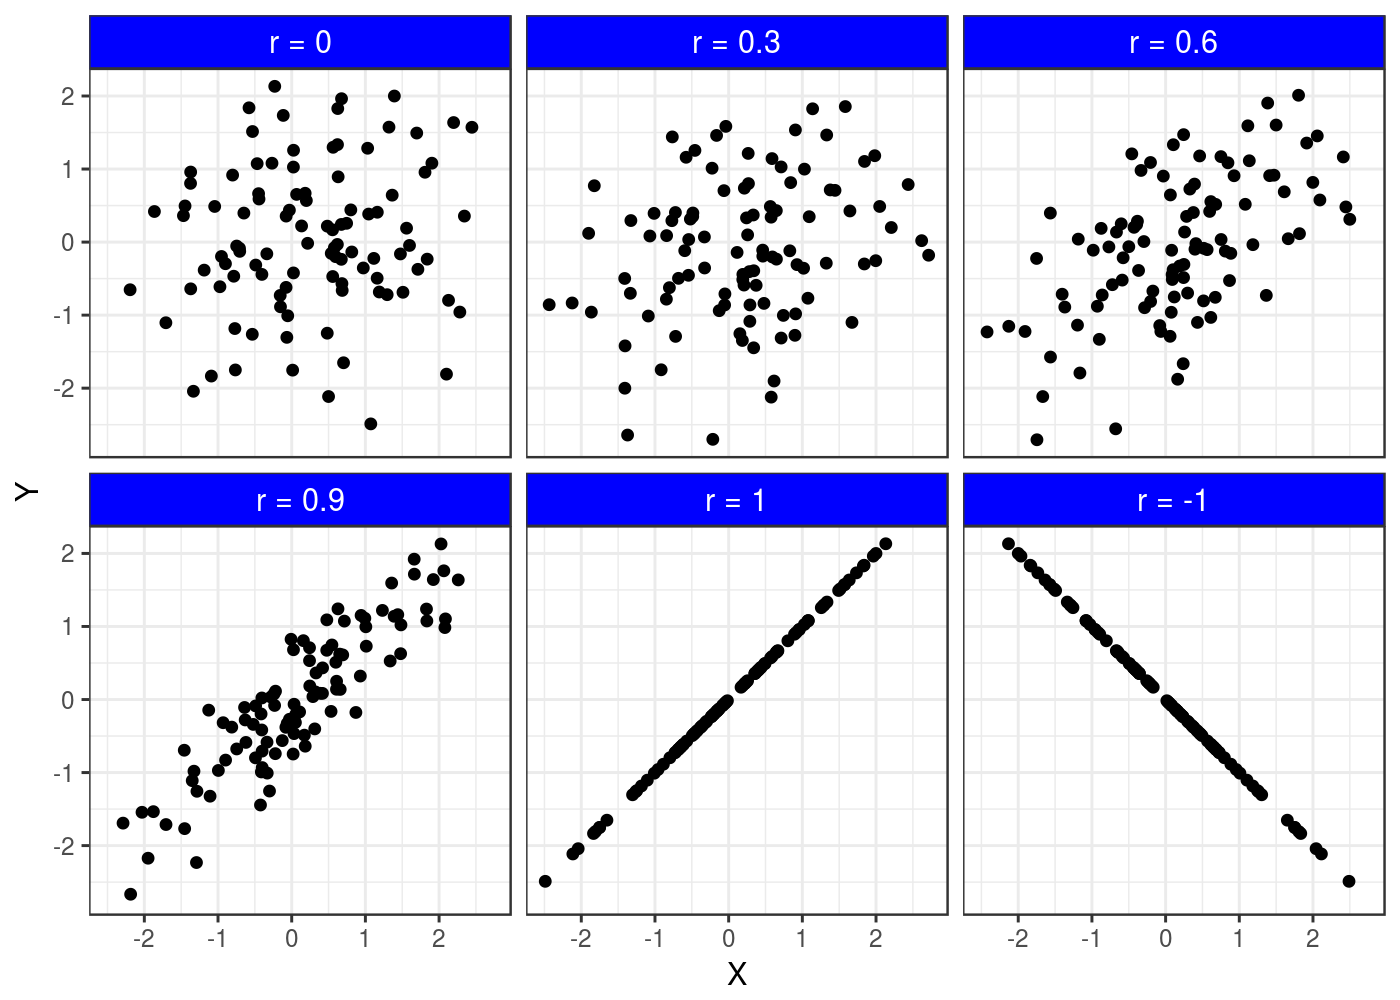

## Correlação entre Pares com Yellowbrick

In [ ]:
df

Removendo informações inúteis

In [ ]:
df_corr = df.drop( columns = ['name', 'ticket', 'home.dest', 'boat', 'body', 'cabin'])

In [ ]:
df_corr

Criando novos atributos numéricos a partir de tipos categóricos

In [ ]:
df_dummies = pd.get_dummies(df_corr)

In [ ]:
df_dummies

In [ ]:
df_dummies.sex_female.corr(df_dummies.sex_male)

In [ ]:
df = df_dummies.drop(columns = 'sex_male')

In [ ]:
df

In [ ]:
Y = df.survived
X = df.drop(columns = "survived")

In [ ]:
X

In [ ]:
Y

In [ ]:
import seaborn  as sns

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.heatmap(X.corr(), 
             fmt = ".2f", 
             annot =  True, 
             ax = ax, 
             cmap = "RdBu_r", 
             vmin = -1, 
             vmax = 1)